# Advanced Regression Model

## - Surprise Housing

# Reading, Understanding and cleaning the data.

In [82]:
## Importing libraries

import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

## Suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
## Importing the data to variable

Data_Raw = pd.read_csv("train.csv")

In [3]:
## Checking the data head

Data_Raw.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
## Realized the need to set the display limits
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [5]:
## Checking the data head

Data_Raw.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
## Checking the data tail

Data_Raw.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [7]:
# Checking the shape to get the total rows and columns

Data_Raw.shape 

(1460, 81)

In [8]:
## Checking for uniqueness in the data

Data_Raw.nunique().sort_values()

CentralAir          2
Utilities           2
Street              2
Alley               2
BsmtHalfBath        3
LandSlope           3
GarageFinish        3
HalfBath            3
PavedDrive          3
PoolQC              3
FullBath            4
MasVnrType          4
BsmtExposure        4
ExterQual           4
MiscFeature         4
BsmtFullBath        4
Fence               4
KitchenQual         4
BsmtCond            4
Fireplaces          4
LandContour         4
LotShape            4
KitchenAbvGr        4
BsmtQual            4
FireplaceQu         5
Electrical          5
YrSold              5
GarageCars          5
GarageQual          5
GarageCond          5
HeatingQC           5
ExterCond           5
MSZoning            5
LotConfig           5
BldgType            5
BsmtFinType2        6
Foundation          6
RoofStyle           6
SaleCondition       6
GarageType          6
BsmtFinType1        6
Heating             6
Functional          7
RoofMatl            8
HouseStyle          8
Condition2

In [9]:
## Checking the info of the data

Data_Raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
## Preventing 'NA' to be read as 'NaN' by pandas
Data = pd.read_csv('train.csv', keep_default_na=False)
Data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [11]:
## Checking the info of the data with new variable

Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

In [12]:
## Replacing all 'NA' of all categorical columns by 'NotAvail'
Data[['Alley','MasVnrType','Electrical', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']] = Data[['Alley','MasVnrType','Electrical', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']].replace("NA", "NotAvail")
Data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NotAvail,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NotAvail,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NotAvail,NotAvail,NotAvail,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NotAvail,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NotAvail,NotAvail,NotAvail,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NotAvail,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NotAvail,NotAvail,NotAvail,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NotAvail,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NotAvail,NotAvail,NotAvail,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NotAvail,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NotAvail,NotAvail,NotAvail,0,12,2008,WD,Normal,250000


In [13]:
## Checking the data info again post updation of categorical values

Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

In [14]:
## Updating "LotFrontage" & "MasVnrArea" type from object to numberic as their value contains numbers
Data['LotFrontage'] = pd.to_numeric(Data['LotFrontage'], errors='coerce')
Data['MasVnrArea'] = pd.to_numeric(Data['MasVnrArea'], errors='coerce')

In [15]:
## Convert three columns to 'object' type as numberic value given to them are rating codes
Data[['MSSubClass', 'OverallQual', 'OverallCond']] = Data[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')

In [16]:
## Check whether the data types of five columns have changed
Data[['MSSubClass', 'OverallQual', 'OverallCond', 'LotFrontage', 'MasVnrArea']].dtypes

MSSubClass      object
OverallQual     object
OverallCond     object
LotFrontage    float64
MasVnrArea     float64
dtype: object

In [17]:
# Checking the numerical columns data distribution statistics

Data.describe()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,24.284752,9981.264932,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,59.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [18]:
## Checking for missing values
Data.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

## Listing Down Column Names with Meanings

- MSZoning: Identifies the general zoning classification of the sale.
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access to property
- Alley: Type of alley access to property
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to various conditions
- Condition2: Proximity to various conditions (if more than one is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Rates the overall material and finish of the house
- OverallCond: Rates the overall condition of the house
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Evaluates the quality of the material on the exterior 
- ExterCond: Evaluates the present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Evaluates the height of the basement
- BsmtCond: Evaluates the general condition of the basement
- BsmtExposure: Refers to walkout or garden level walls
- BsmtFinType1: Rating of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Rating of basement finished area (if multiple types)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms feet
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Bedrooms above grade (does NOT include basement bedrooms)
- Kitchen: Kitchens above grade
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality (Assume typical unless deductions are warranted)
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: Value of miscellaneous feature
- MoSold: Month Sold (MM)
- YrSold: Year Sold (YYYY)
- SaleType: Type of sale
- SaleCondition: Condition of sale
- SalePrice: Price of the property \ Target variable

In [19]:
## Filling the missing values in "LotFrontage", "MasVnrArea" and "GarageYrBlt" columns by their means
Data['LotFrontage'].fillna(Data['LotFrontage'].mean(), inplace=True)
Data['MasVnrArea'].fillna(Data['MasVnrArea'].mean(), inplace=True)

In [20]:
## Checking again for missing values
Data.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

## Missing values have been fixed from all columns
- Except for "GarageYrBlt" as we can use it as dummy variable at later stage

## Since this is analysis for business, we should focus on "Sale Price" variable as target variable

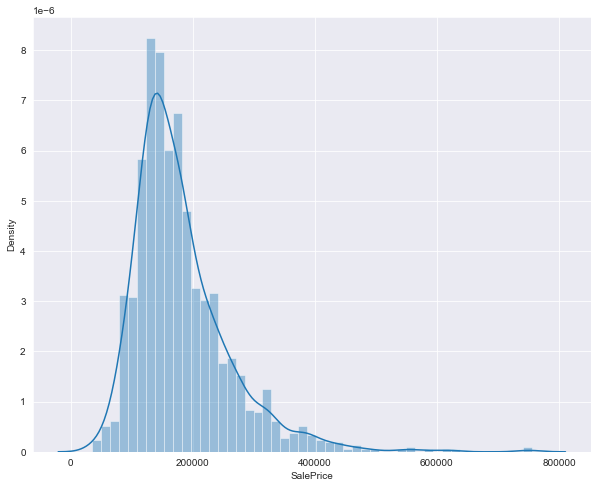

In [21]:
## Analyysis on target variable 'SalePrice'
plt.figure(figsize=[10,8])
sns.set_style('darkgrid')
sns.distplot(Data['SalePrice']);

In [22]:
## Also check summary of it
Data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [23]:
## We have an issue here, the variable is skewed which requires little fixing
## Check the skewness & kurtosis of target variable
print("Skewness:",Data['SalePrice'].skew())
print("Kurtosis:",Data['SalePrice'].kurt())

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


In [24]:
## Using "Log transform" on the target variable
Data['SalePrice'] = np.log(Data['SalePrice'])

In [25]:
## Check the skewness & kurtosis of target variable post fix
print("Skewness:",Data['SalePrice'].skew())
print("Kurtosis:",Data['SalePrice'].kurt())

Skewness: 0.12133506220520406
Kurtosis: 0.8095319958036296


### Both skewness & kurtosis are less than 1 now.

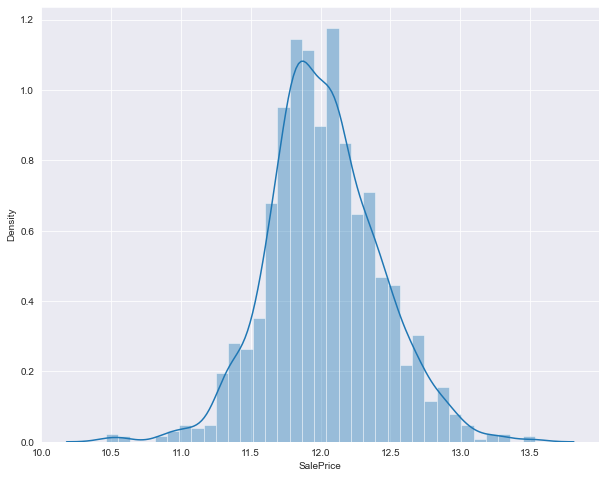

In [26]:
## Checking the distribution plot on target variable 'SalePrice' again
plt.figure(figsize=[10,8])
sns.set_style('darkgrid')
sns.distplot(Data['SalePrice']);

### The target variable now seems to have a normal distribution.

# Exploratory Data Analysis

In [27]:
## Divide the data into numerical and categorical columns

## Extract numerical columns
Data_num = Data.select_dtypes(include=['int64', 'float64'])

## Extract categorical columns
Data_cat = Data.select_dtypes(include='object')

## Printing the both splited columns names
print("Numberic columns:",Data_num.columns)
print("Categorical columns:",Data_cat.columns)

Numberic columns: Index(['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Categorical columns: Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinTyp

In [28]:
## Numeric columns Heads
Data_num.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,65.0,8450,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,12.247694
1,2,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,12.109011
2,3,68.0,11250,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,12.317167
3,4,60.0,9550,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,11.849398
4,5,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,12.429216


In [29]:
## Categorical Columns Heads
Data_cat.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,NotAvail,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NotAvail,Attchd,2003,RFn,TA,TA,Y,NotAvail,NotAvail,NotAvail,WD,Normal
1,20,RL,Pave,NotAvail,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,1976,RFn,TA,TA,Y,NotAvail,NotAvail,NotAvail,WD,Normal
2,60,RL,Pave,NotAvail,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,2001,RFn,TA,TA,Y,NotAvail,NotAvail,NotAvail,WD,Normal
3,70,RL,Pave,NotAvail,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,1998,Unf,TA,TA,Y,NotAvail,NotAvail,NotAvail,WD,Abnorml
4,60,RL,Pave,NotAvail,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,2000,RFn,TA,TA,Y,NotAvail,NotAvail,NotAvail,WD,Normal


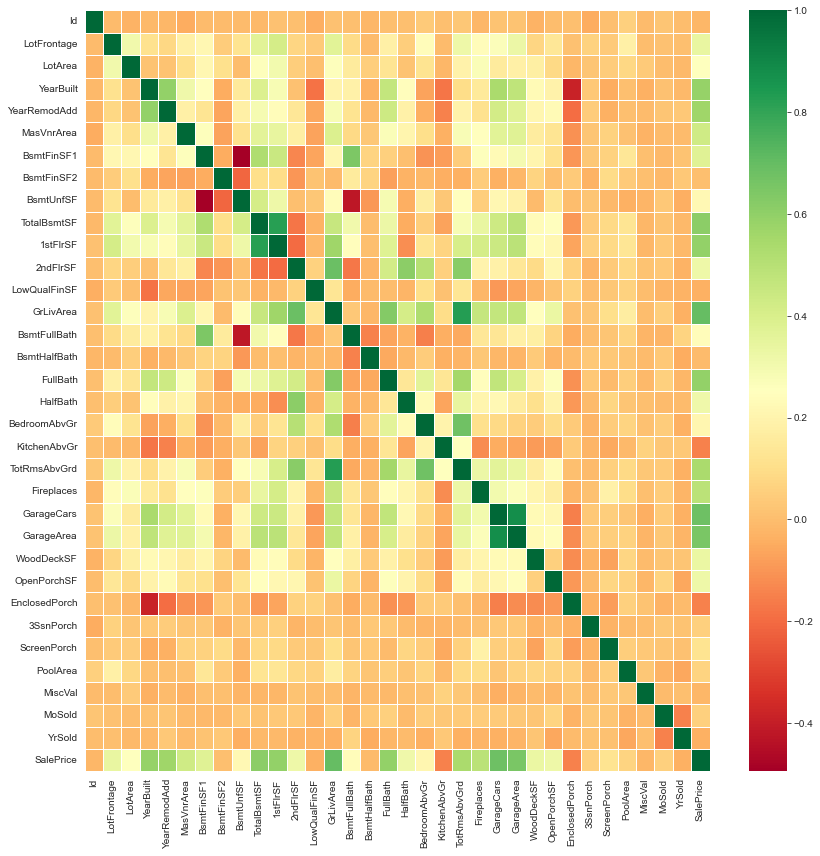

In [30]:
# Prepaping heatmap graph on numberic variables to see possible correlations

plt.figure(figsize = (14,14))
ax= sns.heatmap(Data_num.corr(), cmap="RdYlGn",linewidth =1) 

# Not using "annot = True" because it is getting diffcult to read with it

## Observations
- Multicollinearity is visible
- TotalBsmtSF has strong correlation with 1StFlrSF
- GarageCars and GarageArea have good correlations
- The target variable has correlations with below variables
- 1. GarageArea
- 2. GarageCars
- 3. FirePlaces
- 4. TotRnsAbvGrd
- 5. FullBath
- 6. GrLivArea
- 7. 1stFlrSF
- 8. TotalBsmtSF
- 9. YearBuilt
- 10. YearRemodAdd

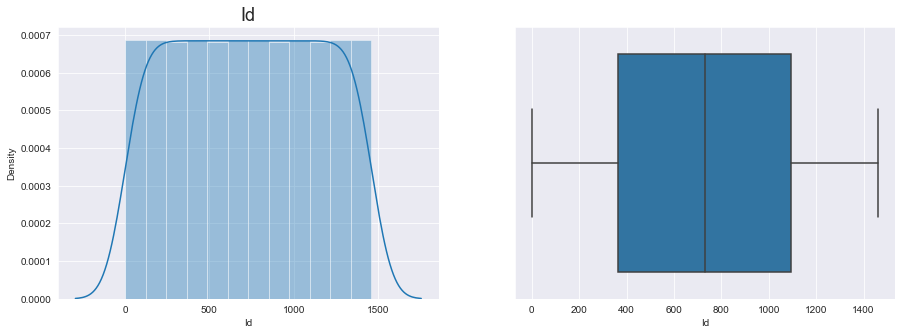

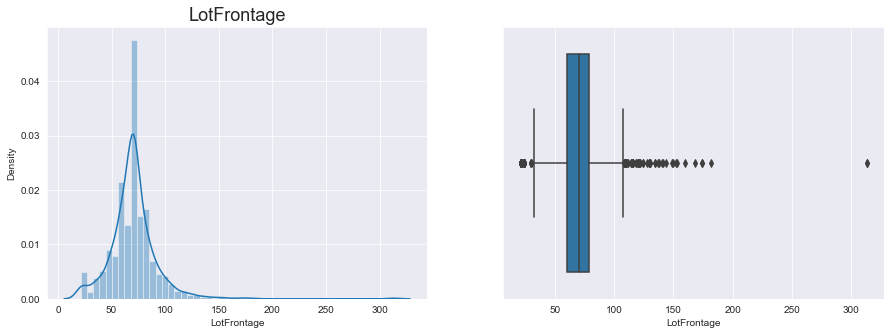

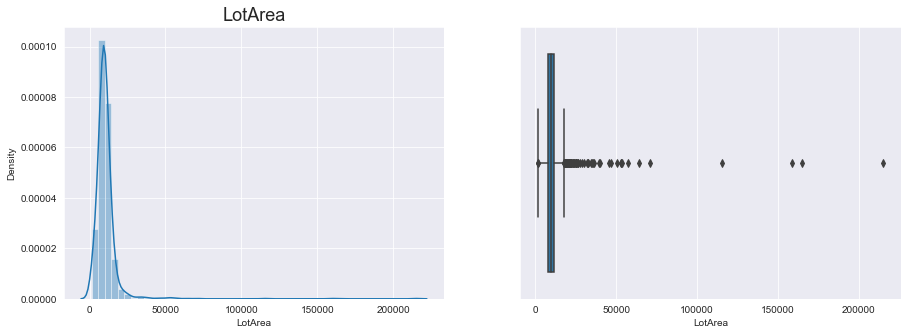

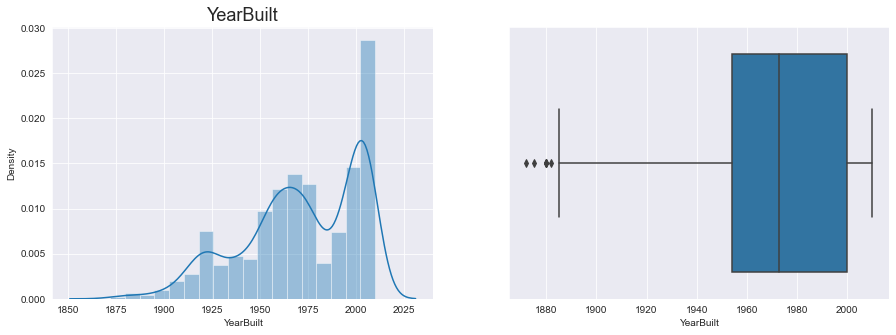

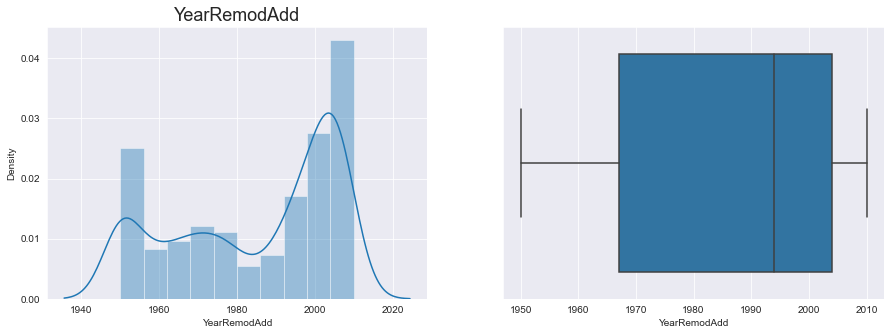

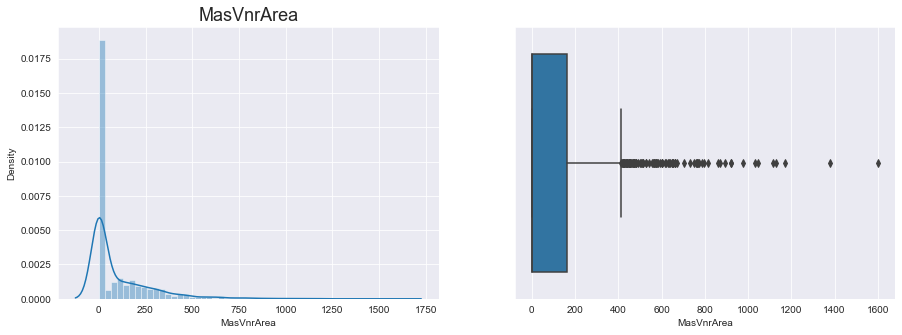

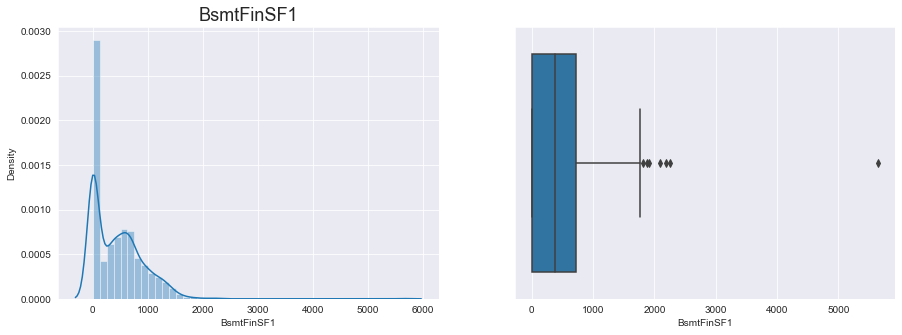

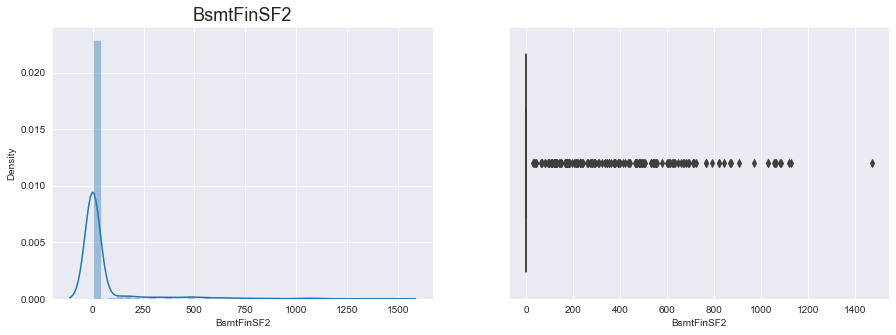

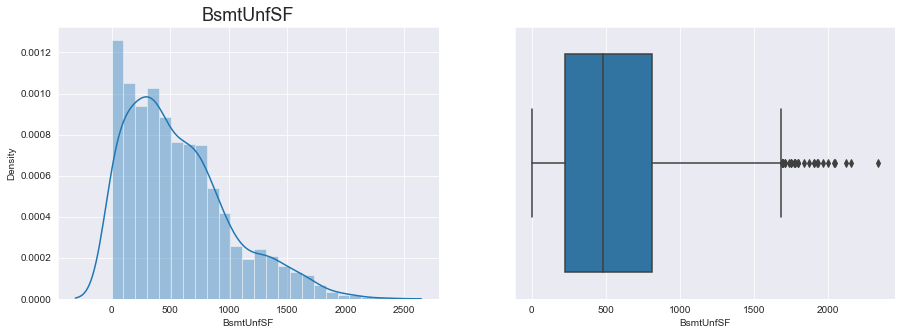

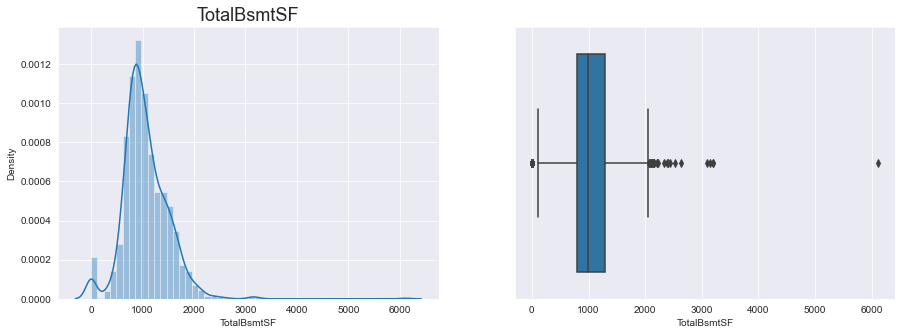

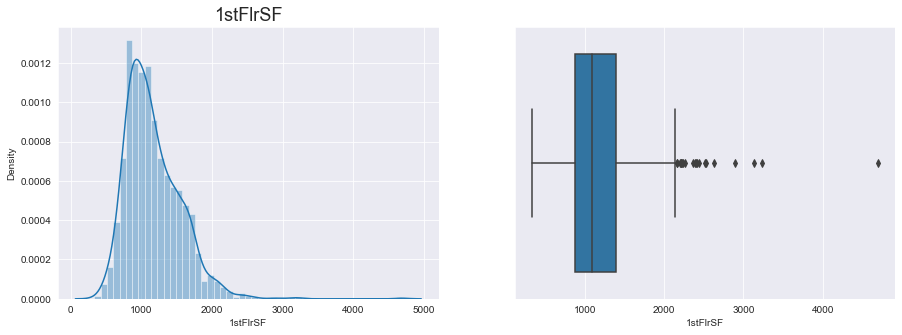

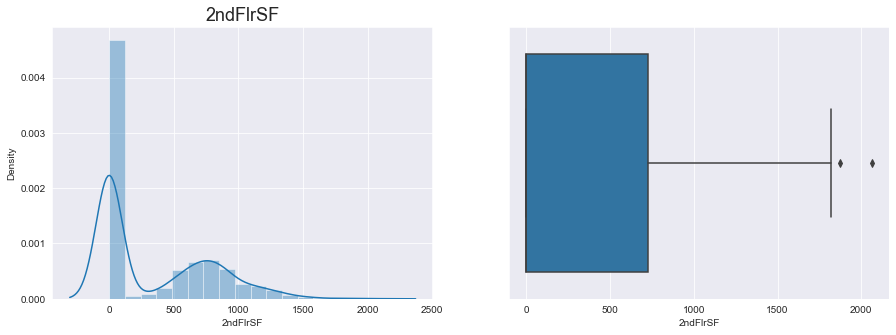

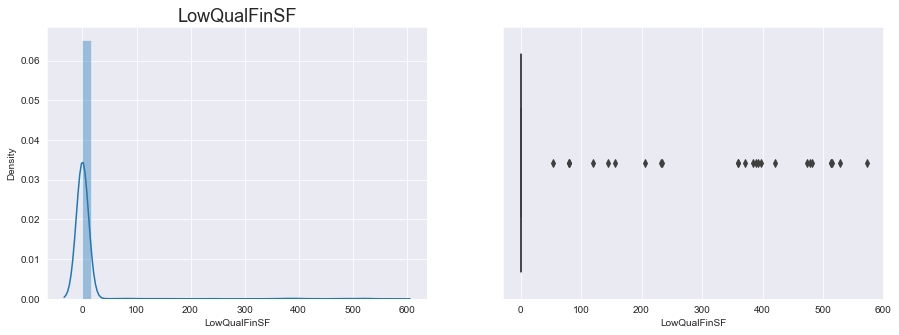

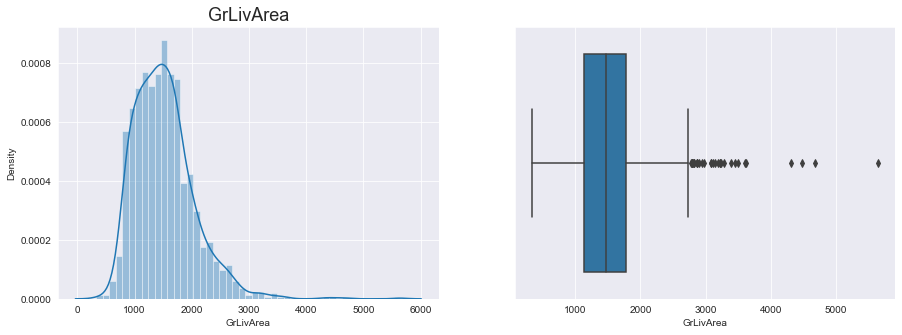

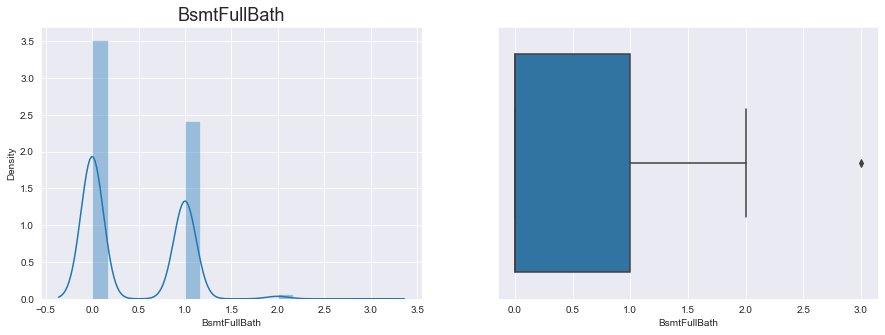

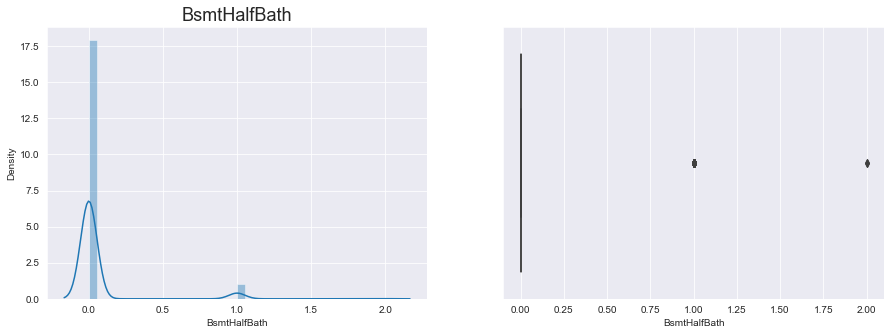

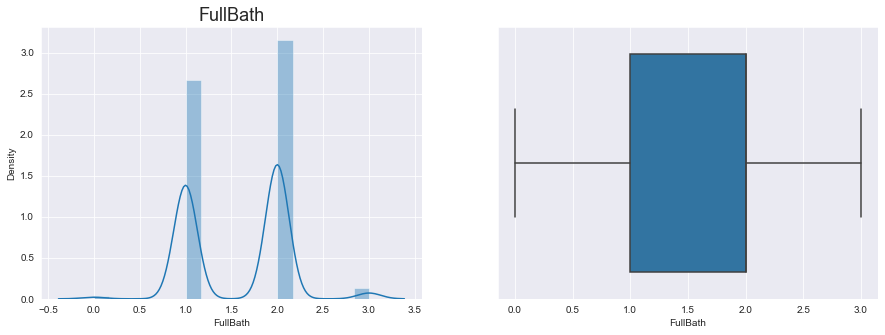

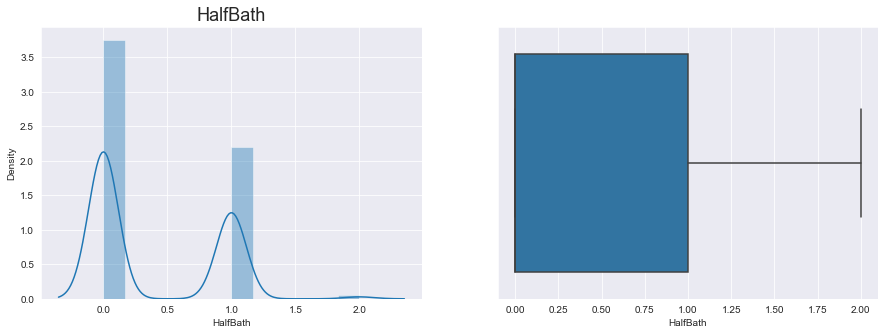

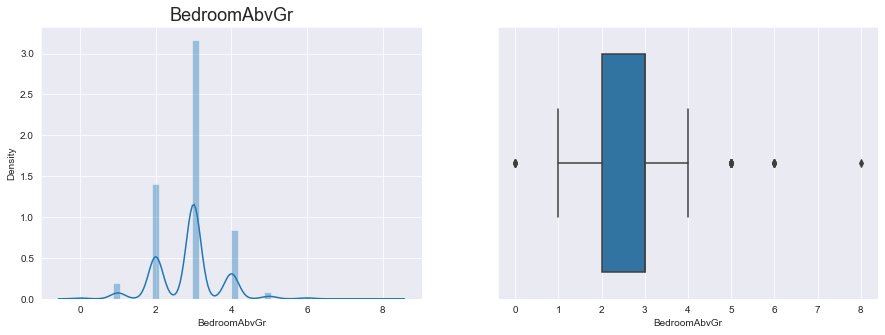

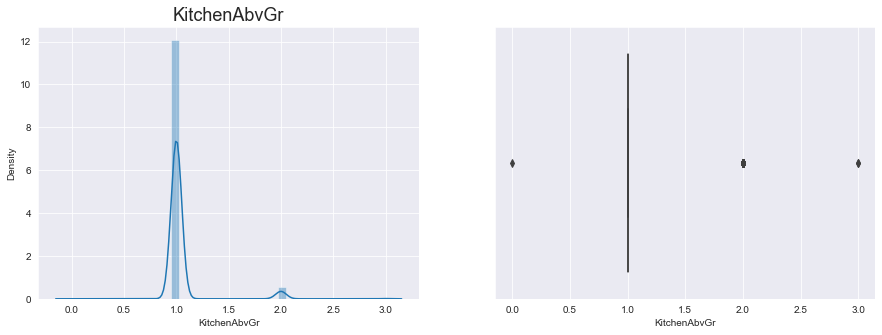

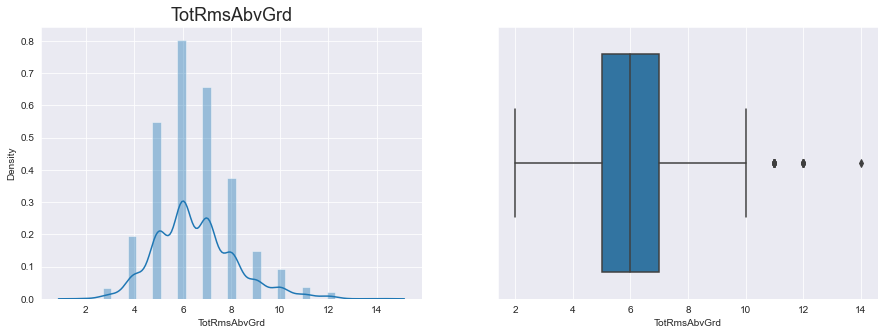

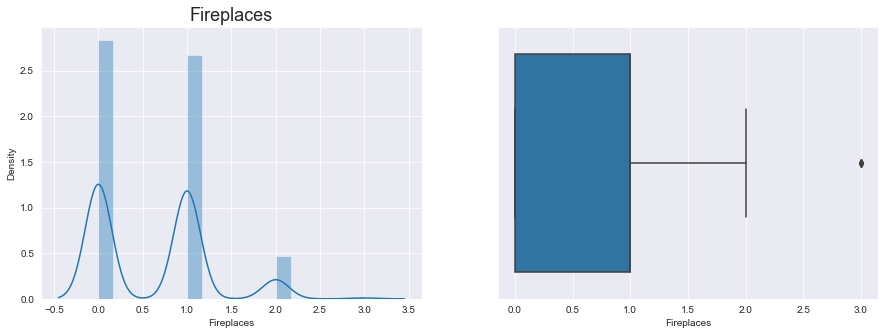

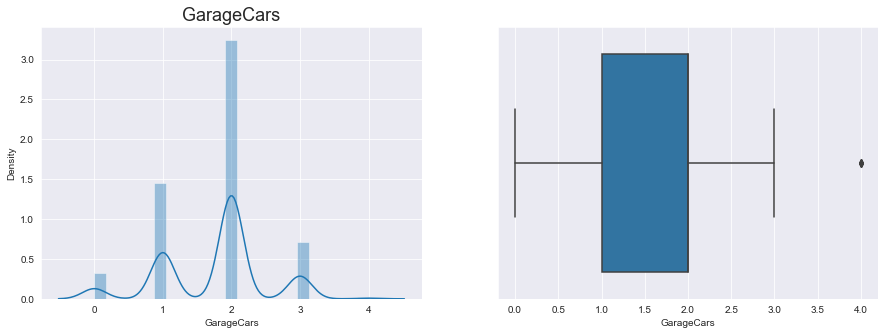

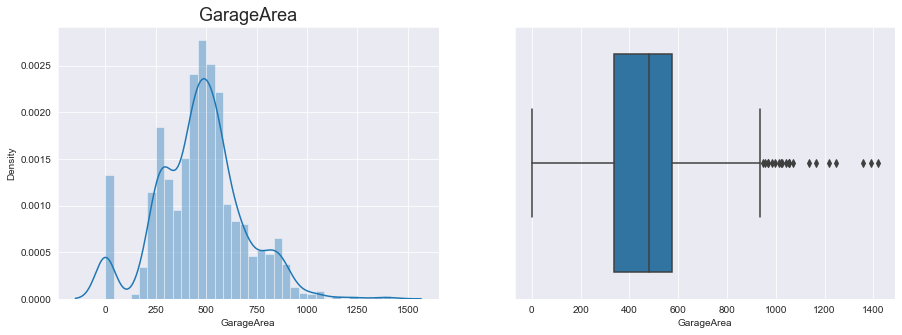

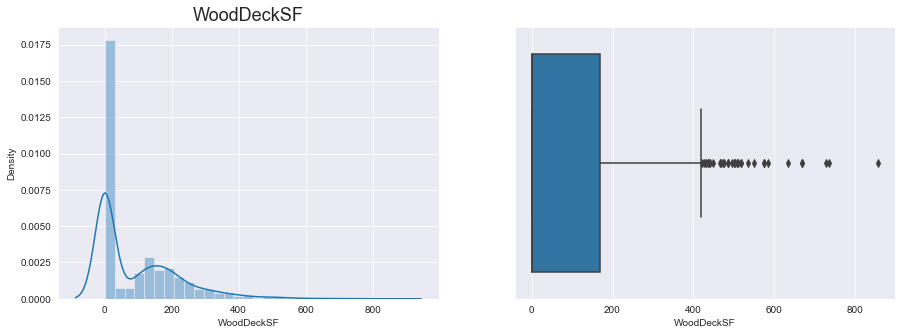

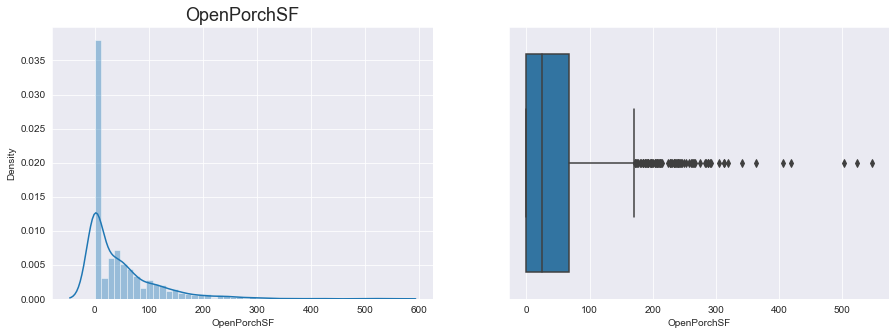

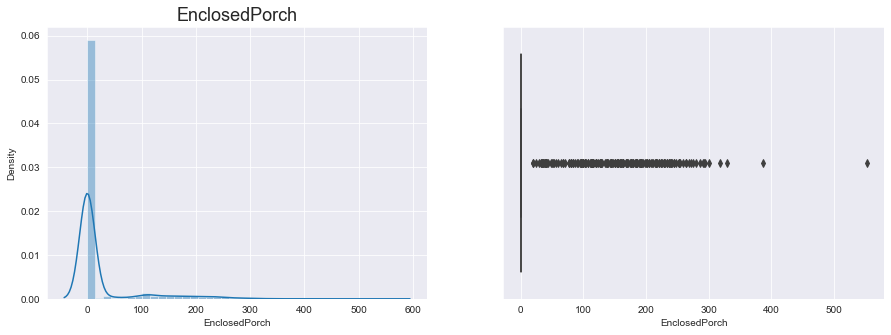

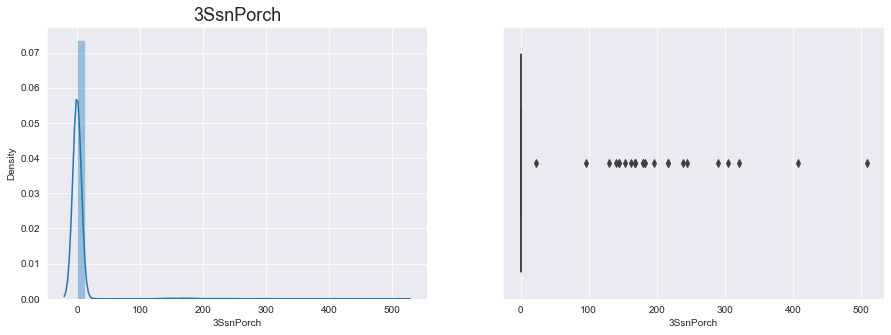

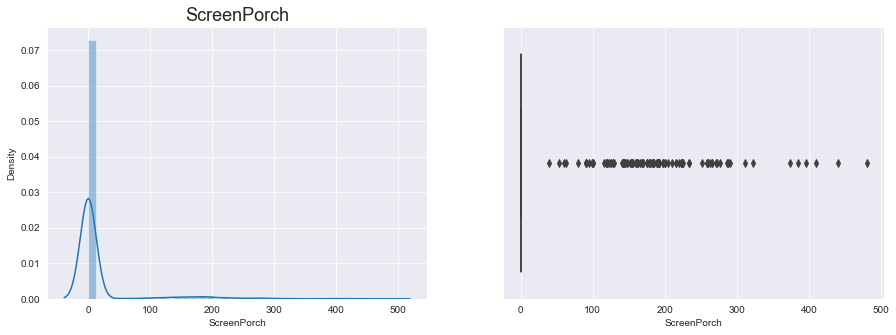

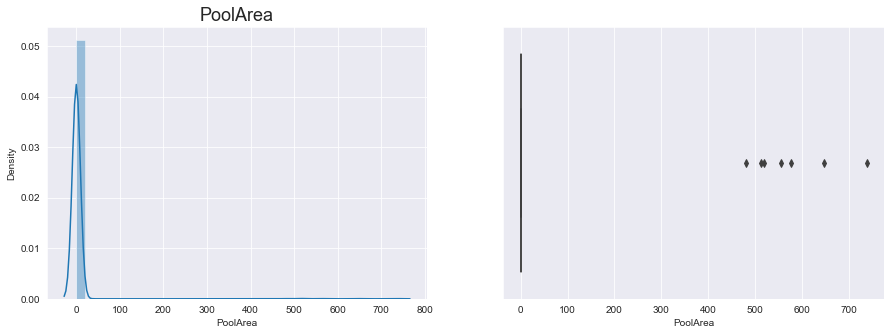

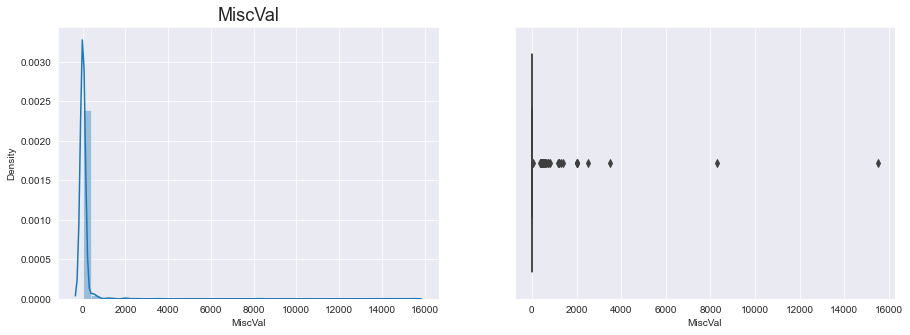

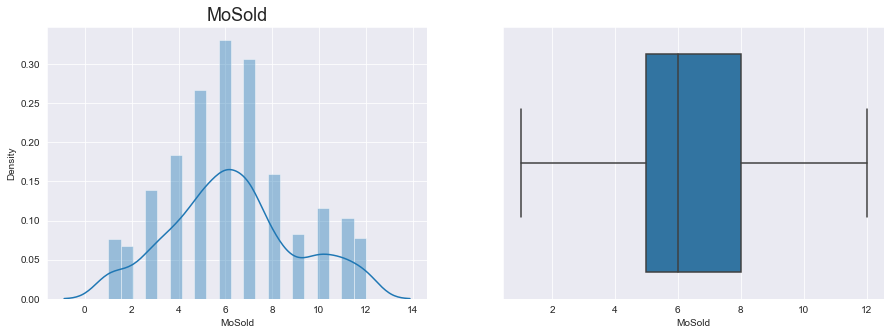

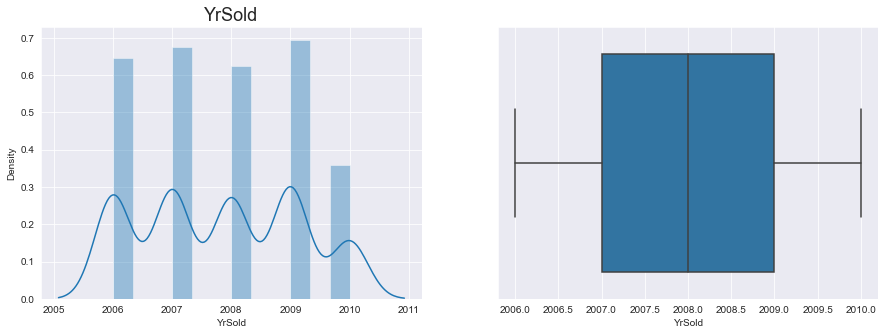

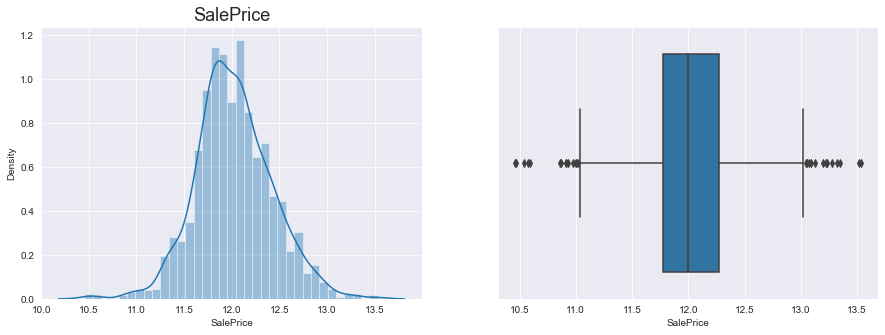

In [31]:
## Visualizing distribution of all numeric variables using histograms and boxplots together

for col in Data_num.columns:
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    plt.title(col, fontdict={'fontsize': 18})
    sns.distplot(Data_num[col])
    
    plt.subplot(1,2,2)
    sns.boxplot(Data_num[col])
    plt.show()

## Observations
- Most columns turns out to be non-normal distributions.
- And outliers are also visible so we need to work on that as well.

In [32]:
## View the unique values of all Categorical columns
for col in Data_cat.columns:
    print(col)
    print(Data[col].unique(), '\n')

MSSubClass
[60 20 70 50 190 45 90 120 30 85 80 160 75 180 40] 

MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH'] 

Street
['Pave' 'Grvl'] 

Alley
['NotAvail' 'Grvl' 'Pave'] 

LotShape
['Reg' 'IR1' 'IR2' 'IR3'] 

LandContour
['Lvl' 'Bnk' 'Low' 'HLS'] 

Utilities
['AllPub' 'NoSeWa'] 

LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] 

LandSlope
['Gtl' 'Mod' 'Sev'] 

Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] 

Condition1
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'] 

Condition2
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe'] 

BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs'] 

HouseStyle
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin'] 

OverallQual
[7 6 8 5 9 4 10 3 1 2] 

OverallCond
[5 8 6 7 4 2 3 9 1] 

RoofStyle
[

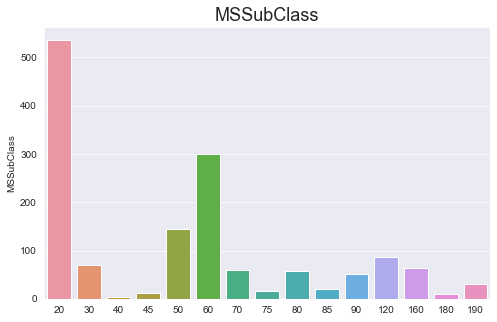

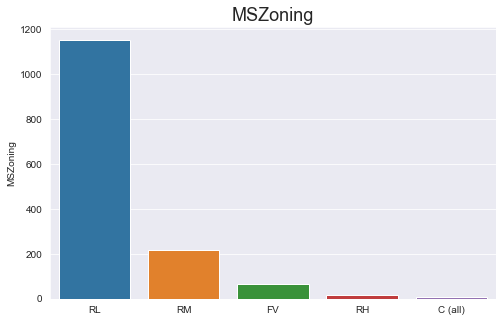

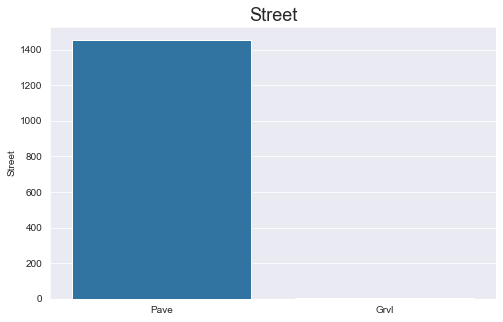

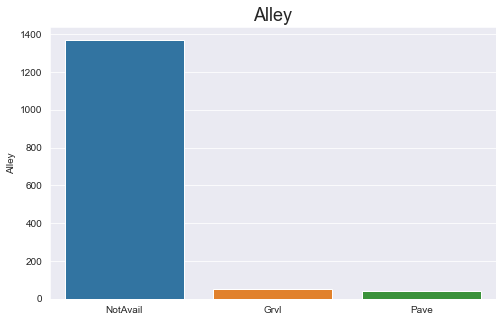

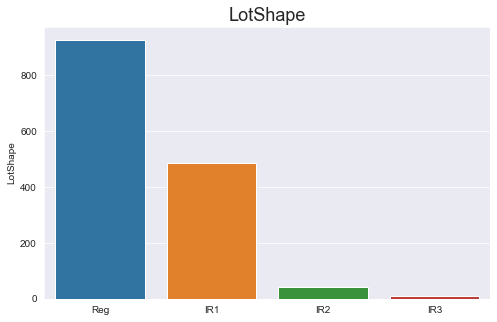

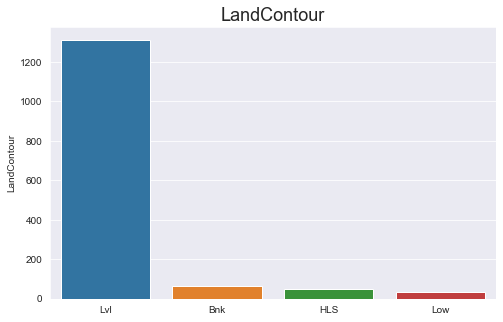

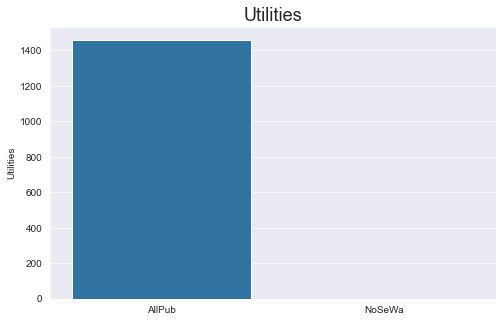

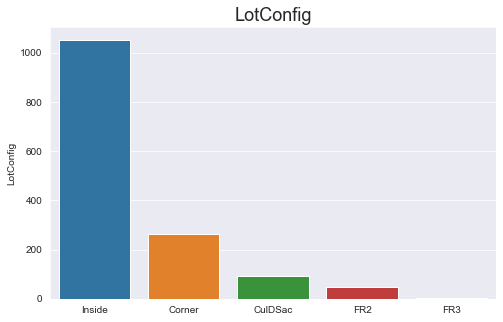

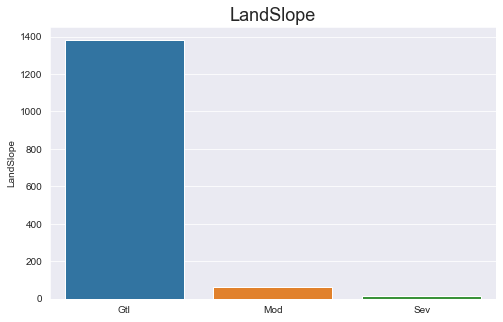

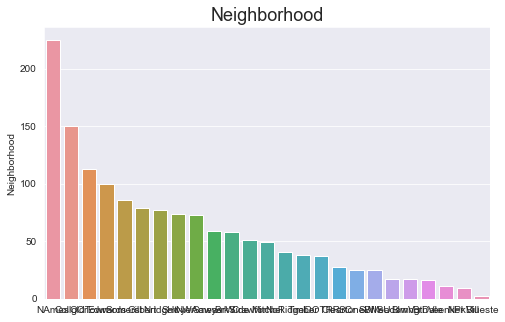

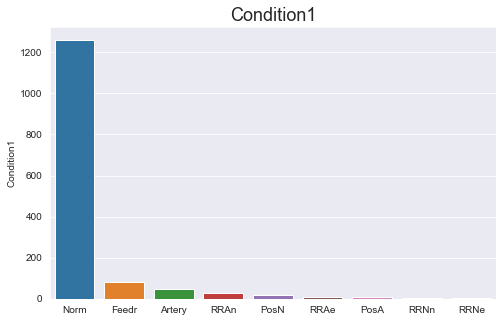

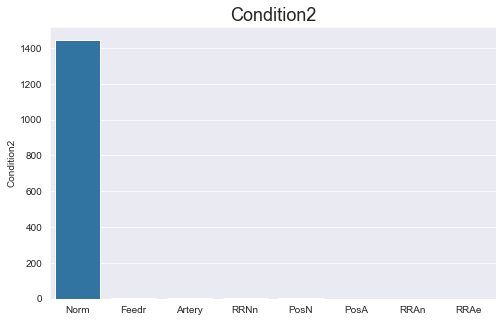

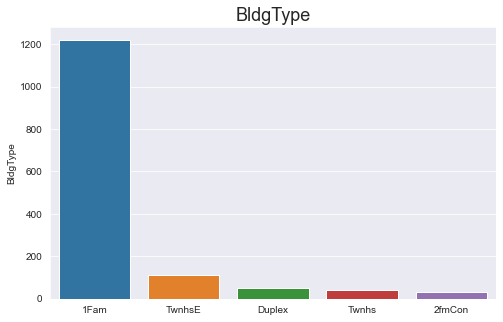

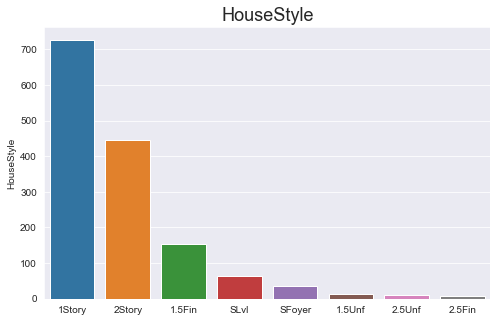

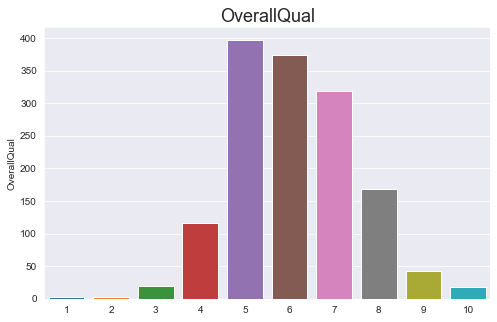

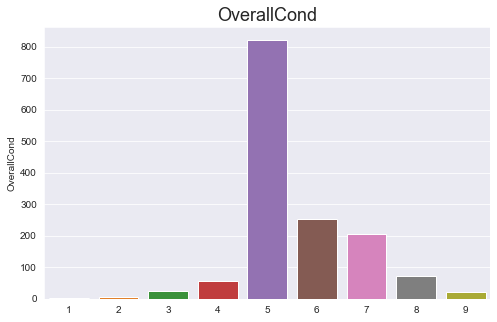

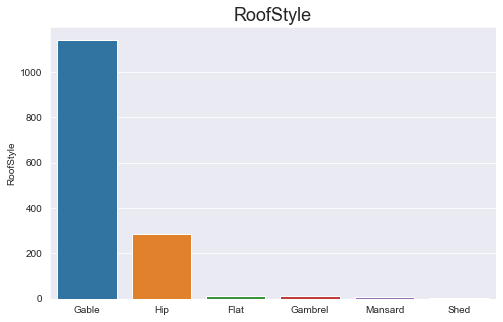

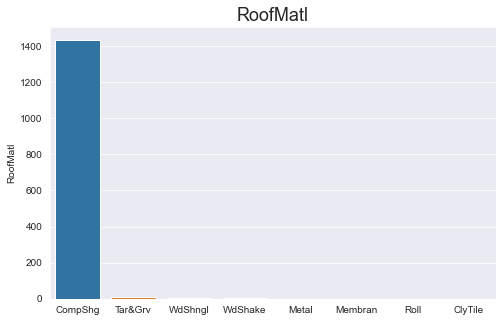

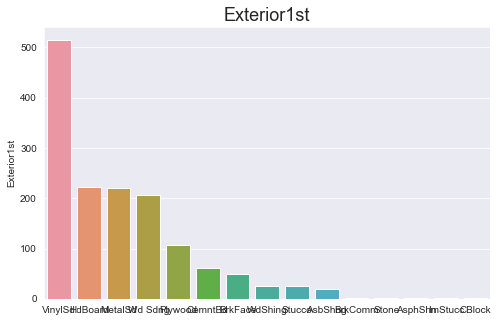

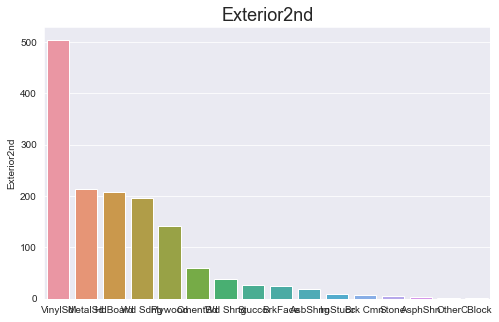

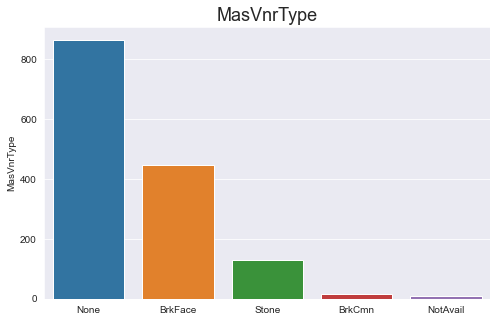

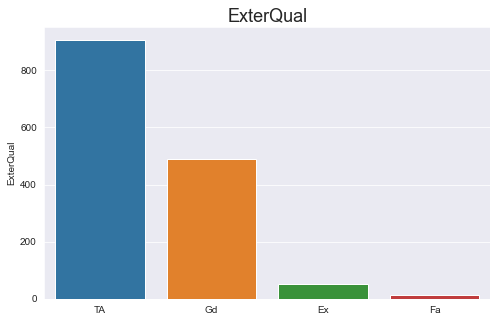

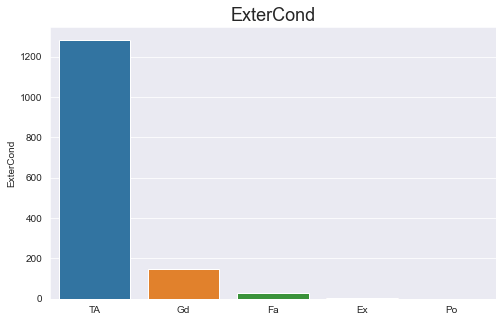

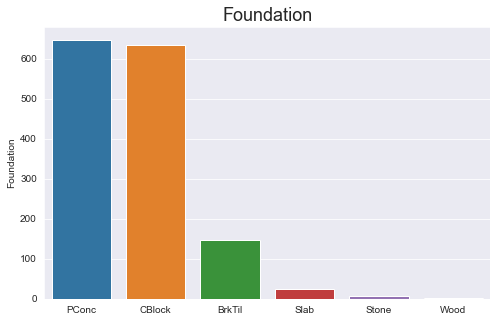

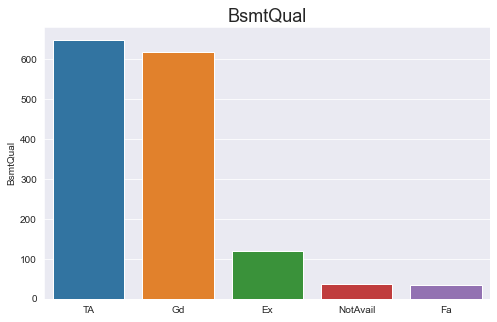

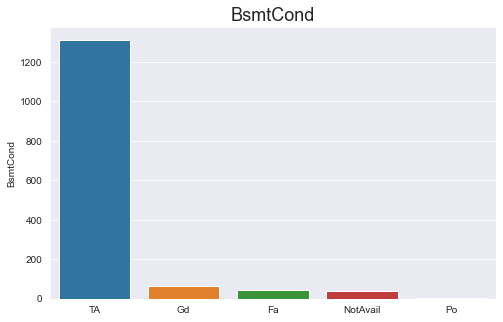

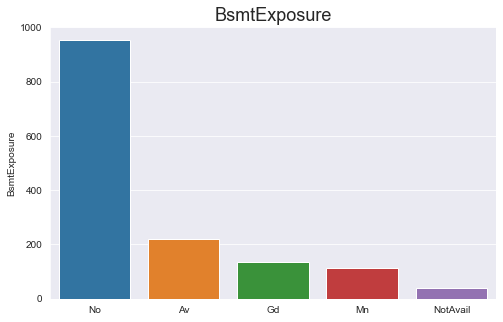

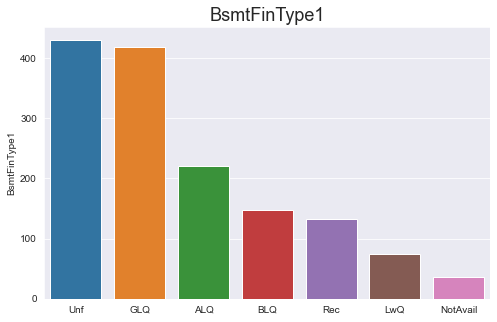

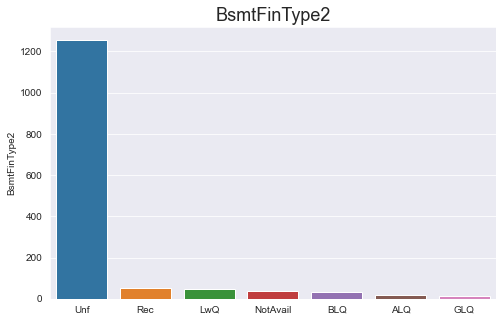

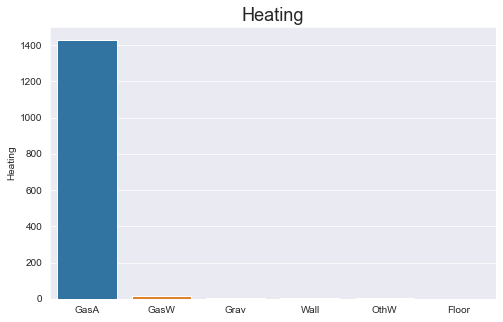

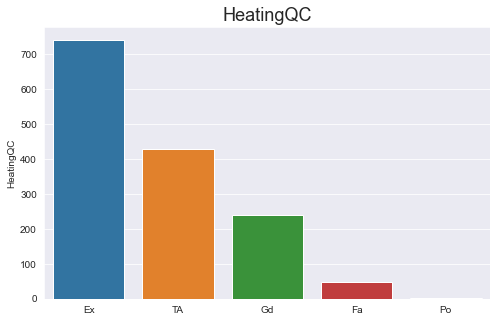

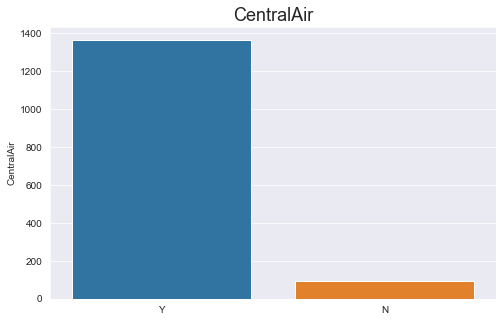

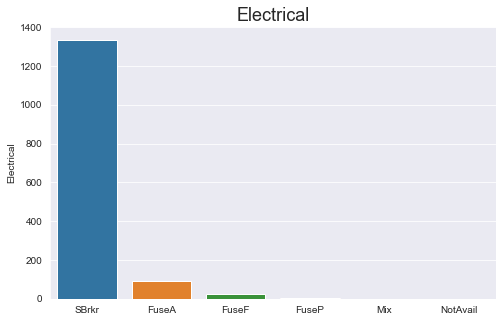

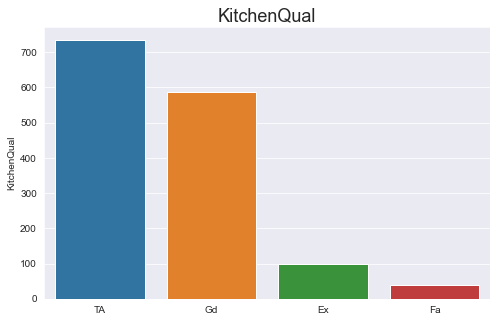

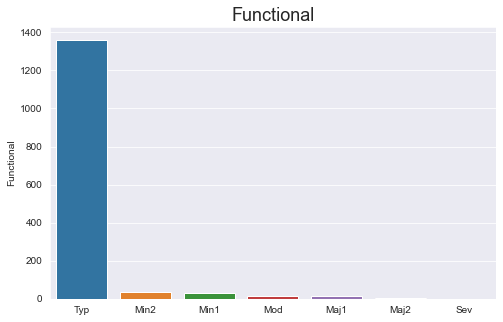

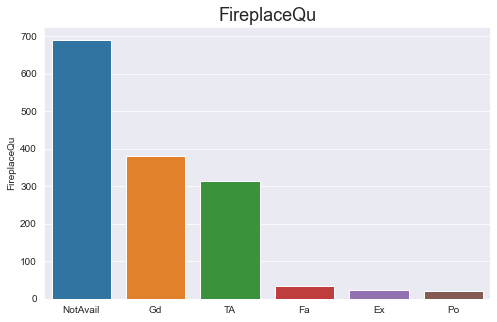

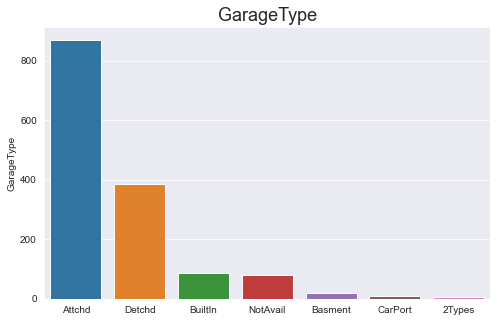

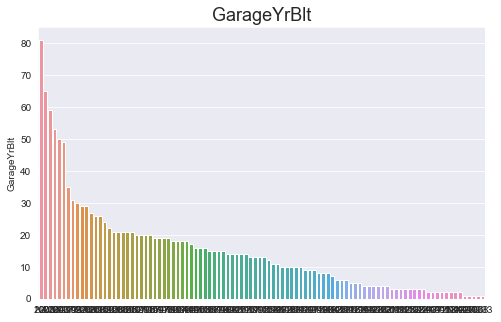

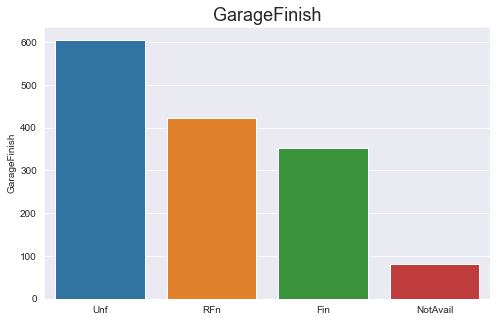

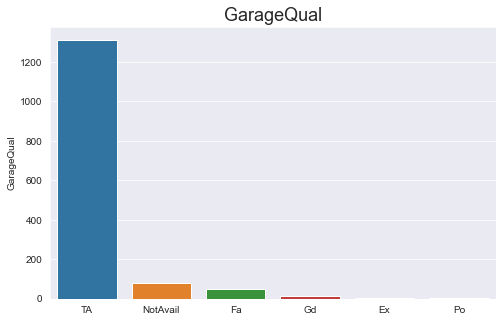

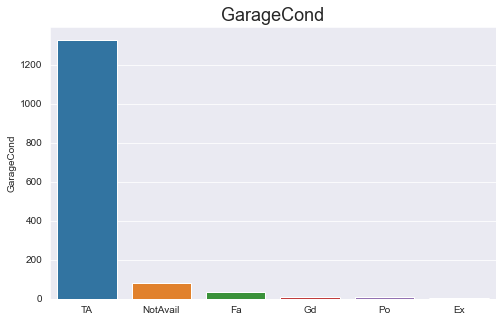

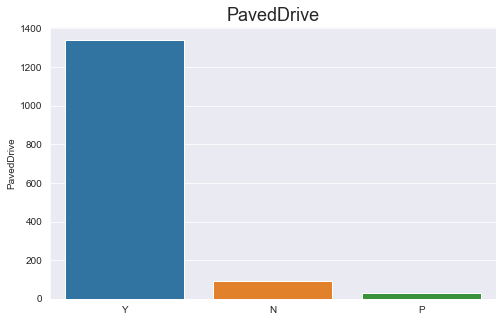

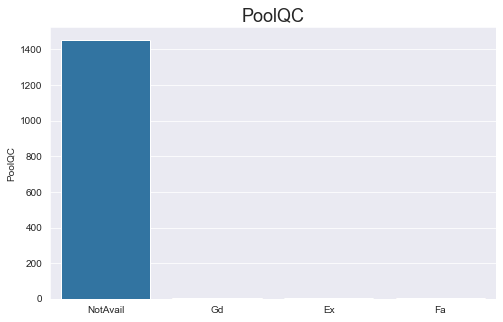

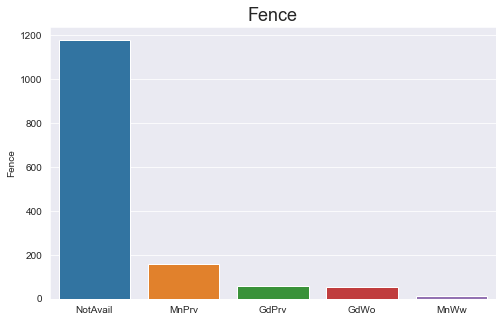

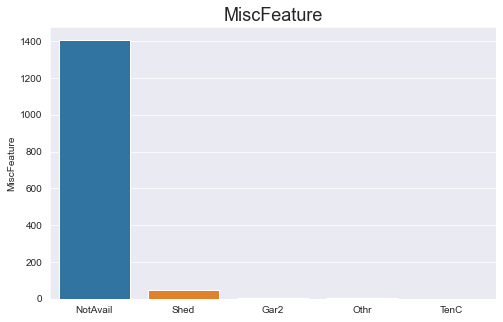

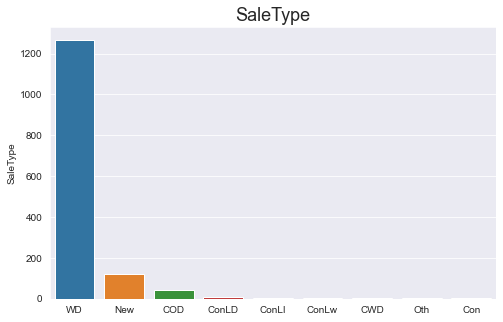

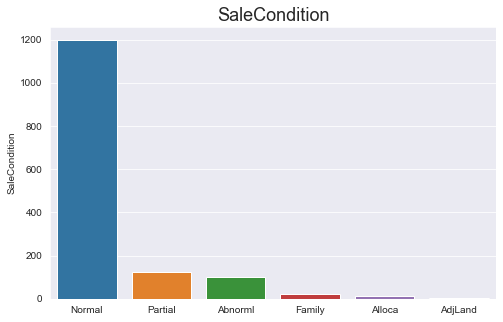

In [33]:
## Visualizing the levels of categorical columns using bar plots
for col in Data_cat.columns:
    plt.figure(figsize=(8,5))
    plt.title(col, fontdict={'fontsize': 18})
    sns.barplot(Data_cat[col].value_counts().index, Data_cat[col].value_counts())
    plt.show()

In [34]:
## Fixing few columns before starting the model building

In [35]:
## Create new column for the age of the house
Data['Age'] = Data['YrSold'] - Data['YearBuilt']

## Drop the two columns from which we created new one
Data.drop(['YrSold', 'YearBuilt'], axis=1, inplace=True)

## View the dataframe again
Data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Age
0,1,60,RL,65.0,8450,Pave,NotAvail,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NotAvail,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NotAvail,NotAvail,NotAvail,0,2,WD,Normal,12.247694,5
1,2,20,RL,80.0,9600,Pave,NotAvail,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NotAvail,NotAvail,NotAvail,0,5,WD,Normal,12.109011,31
2,3,60,RL,68.0,11250,Pave,NotAvail,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NotAvail,NotAvail,NotAvail,0,9,WD,Normal,12.317167,7
3,4,70,RL,60.0,9550,Pave,NotAvail,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NotAvail,NotAvail,NotAvail,0,2,WD,Abnorml,11.849398,91
4,5,60,RL,84.0,14260,Pave,NotAvail,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NotAvail,NotAvail,NotAvail,0,12,WD,Normal,12.429216,8


In [36]:
## Initiating dummy variables creation

#Updating the variables again as we modified the source data variable in previous step

Data_num = Data.select_dtypes(include=['int64', 'float64'])
Data_cat = Data.select_dtypes(include='object')

## Encoding the categorical columns
Data_cat_encoded = pd.get_dummies(Data_cat, drop_first=True)
Data_cat_encoded.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NotAvail,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_NotAvail,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NotAvail,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NotAvail,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NotAvail,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NotAvail,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NotAvail,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_NotAvail,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NotAvail,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NotAvail,GarageYrBlt_1906,GarageYrBlt_1908,GarageYrBlt_1910,GarageYrBlt_1914,GarageYrBlt_1915,GarageYrBlt_1916,GarageYrBlt_1918,GarageYrBlt_1920,GarageYrBlt_1921,GarageYrBlt_1922,GarageYrBlt_1923,GarageYrBlt_1924,GarageYrBlt_1925,GarageYrBlt_1926,GarageYrBlt_1927,GarageYrBlt_1928,GarageYrBlt_1929,GarageYrBlt_1930,GarageYrBlt_1931,GarageYrBlt_1932,GarageYrBlt_1933,GarageYrBlt_1934,GarageYrBlt_1935,GarageYrBlt_

In [37]:
## Checking the categorical variable dimensions
Data_cat_encoded.shape

(1460, 353)

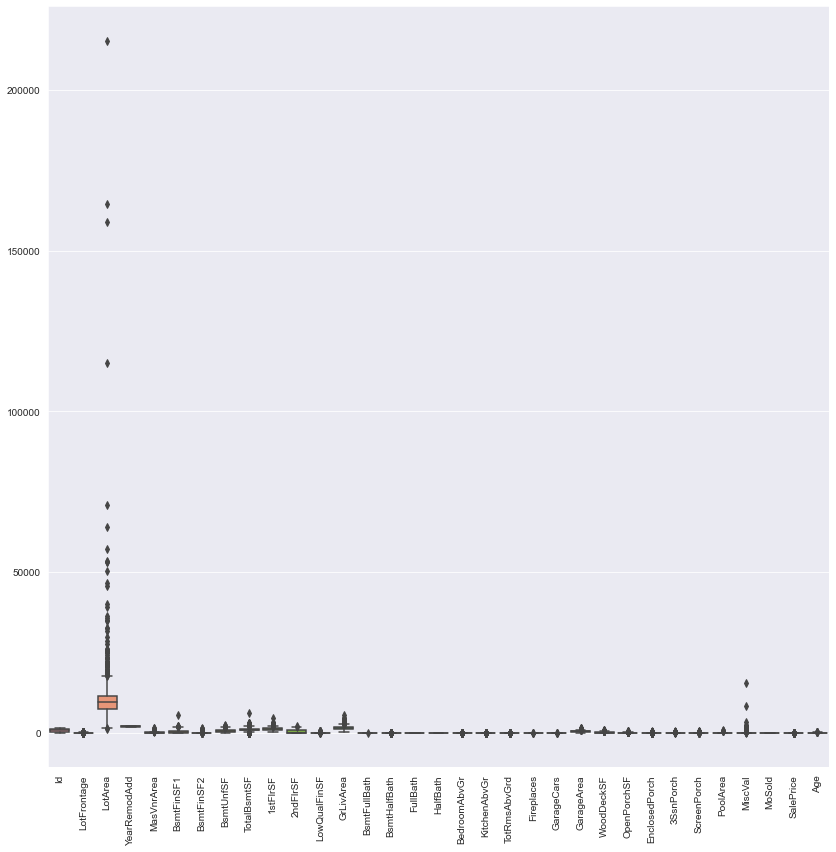

In [38]:
## Checking for outliers

plt.figure(figsize=[14,14])
plt.xticks(rotation=90)
sns.boxplot(data=Data_num);

In [39]:
## Filtering outliers between 5%-95%
for col in Data_num.columns:
    Data_num[col][Data_num[col] <= Data_num[col].quantile(0.05)] = Data_num[col].quantile(0.05)
    Data_num[col][Data_num[col] >= Data_num[col].quantile(0.95)] = Data_num[col].quantile(0.95)

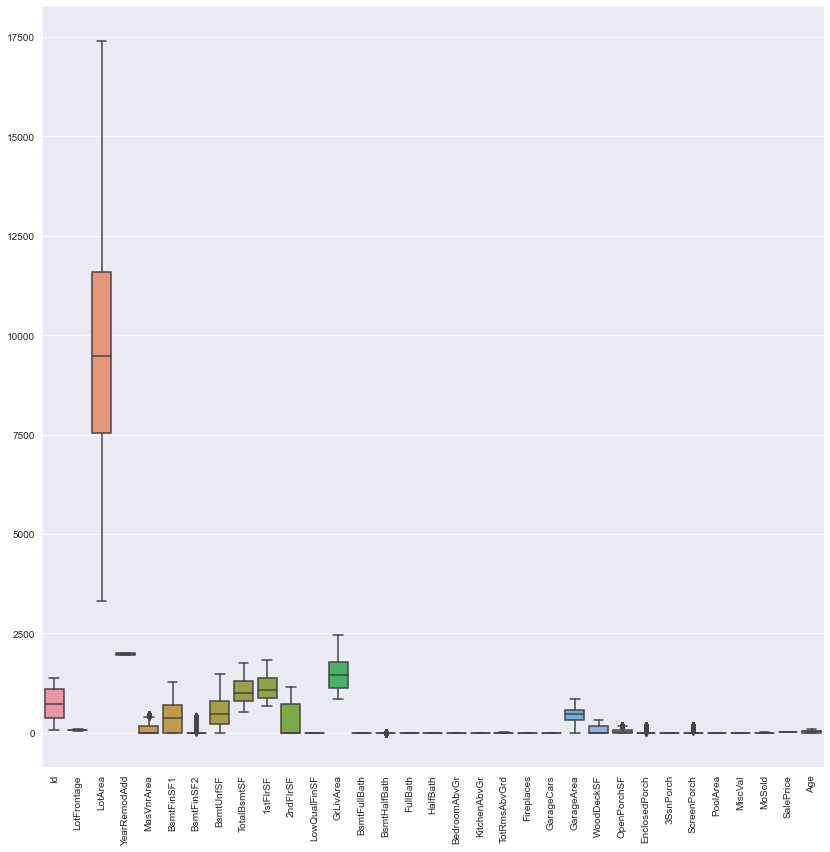

In [40]:
## Checking for outliers again posting filterations

plt.figure(figsize=[14,14])
plt.xticks(rotation=90)
sns.boxplot(data=Data_num);

### Data seemsbetter compared to before treating Outliers

In [41]:
## Merging the data
Data = pd.concat([Data_num, Data_cat_encoded], axis=1)


## View the first few rows of our dataframe
Data.head()

,Id,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Age,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NotAvail,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_NotAvail,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NotAvail,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NotAvail,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NotAvail,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NotAvail,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NotAvail,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_NotAvail,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NotAvail,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NotAvail,GarageYrBlt_1906,GarageYrBlt_1908,GarageYrBlt_1910,GarageY

## Spliting the data for Train & Test

In [42]:
# Filling X
X = Data.drop(["Id", "SalePrice"], axis=1).copy()

# Separating the target variable as y to predict
y = Data["SalePrice"].copy()

# Data Spliting

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7,test_size = 0.3, random_state=100)

# Printing Data shape post slpit

print(X_train.shape)
print(y_test.shape)

(1021, 384)
(438,)


In [43]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021 entries, 210 to 79
Columns: 384 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(11), int64(20), uint8(353)
memory usage: 607.2 KB


## Scaling the Variables\Features

In [44]:
# Normalization

# 1. Instantiate\Create an object
scaler = MinMaxScaler()

# Create a list of numeric variables(except Dummy)
num_var = X_train.select_dtypes(include=['int64', 'float64']).columns


# 2. Fit the data
X_train[num_var] = scaler.fit_transform(X_train[num_var])
X_test[num_var] = scaler.transform(X_test[num_var])

X_train.head()

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,Age,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NotAvail,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_NotAvail,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NotAvail,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NotAvail,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NotAvail,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NotAvail,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NotAvail,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_NotAvail,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NotAvail,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NotAvail,GarageYrBlt_1906,GarageYrBlt_1908,GarageYrBlt_1910,GarageYrBlt_1914,Gar

## Evaluation

In [45]:
# list of alphas to tune
Parameters = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# Lasso

## We chose Lasso first as it is more agreesive compared to Ridge but we expect Ridge will provide more positive outcome

In [47]:
## Calling Lasso function and feeding the data
Lasso = Lasso()

LassoCV = GridSearchCV(estimator = Lasso, 
                        param_grid = Parameters, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
LassoCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [48]:
LassoCV_results = pd.DataFrame(LassoCV.cv_results_)
LassoCV_results = LassoCV_results[LassoCV_results['param_alpha']<=100]
LassoCV_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.139597,0.056467,0.006580,0.000493,0.0001,{'alpha': 0.0001},-0.074719,-0.080144,-0.076802,-0.071863,-0.068434,-0.074392,0.004022,2,-0.048580,-0.048509,-0.048621,-0.049373,-0.050222,-0.049061,0.000660
1,0.043285,0.005698,0.006782,0.001162,0.001,{'alpha': 0.001},-0.070314,-0.081107,-0.074652,-0.071419,-0.071145,-0.073727,0.003974,1,-0.066975,-0.064425,-0.065666,-0.066530,-0.067743,-0.066268,0.001140
2,0.026729,0.002395,0.006984,0.000006,0.01,{'alpha': 0.01},-0.102819,-0.109588,-0.106060,-0.105794,-0.111922,-0.107237,0.003177,3,-0.107392,-0.103426,-0.104511,-0.105449,-0.105072,-0.105170,0.001304
3,0.024734,0.003050,0.005983,0.000001,0.05,{'alpha': 0.05},-0.211431,-0.206467,-0.190695,-0.193701,-0.205425,-0.201544,0.007953,4,-0.199426,-0.199514,-0.202415,-0.199942,-0.200585,-0.200377,0.001099
4,0.020546,0.003710,0.006980,0.001093,0.1,{'alpha': 0.1},-0.291899,-0.284048,-0.268621,-0.273099,-0.286375,-0.280808,0.008631,5,-0.278542,-0.280271,-0.278827,-0.283151,-0.279427,-0.280043,0.001662


In [49]:
## View the optimal value of alpha
LassoCV.best_params_

{'alpha': 0.001}

In [50]:
## View the results of cross validation search
LassoCV.cv_results_

{'mean_fit_time': array([0.13959708, 0.04328451, 0.02672877, 0.02473421, 0.02054601,
        0.02014918, 0.0175529 , 0.0185514 , 0.01815238, 0.01815362,
        0.01815186, 0.01715989, 0.01655607, 0.01875019, 0.01695485,
        0.01615615, 0.01695623, 0.01695547, 0.0169549 , 0.01755352,
        0.01795278, 0.01715536, 0.01715446, 0.01795344, 0.01715541,
        0.01735415, 0.01795254, 0.01835184]),
 'std_fit_time': array([5.64669737e-02, 5.69803419e-03, 2.39538392e-03, 3.05037793e-03,
        3.70987861e-03, 3.18217481e-03, 4.88170117e-04, 2.23889735e-03,
        9.77400117e-04, 1.46384891e-03, 1.16309802e-03, 4.03340917e-04,
        1.19608251e-03, 4.10722968e-03, 6.29925356e-04, 3.99852634e-04,
        1.26150239e-03, 1.09314586e-03, 5.84003864e-07, 2.72035524e-03,
        1.09271047e-03, 3.98659774e-04, 7.45463505e-04, 3.09080586e-03,
        7.44696560e-04, 1.01790723e-03, 1.09197156e-03, 1.19613034e-03]),
 'mean_score_time': array([0.00657992, 0.0067822 , 0.00698419, 0.00598292, 

In [53]:
## Creating Lasso Model against optimal value of alpha
Lasso = Lasso(alpha=0.001)

# Fitting the model on training data
Lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [54]:
## Checking the coefficients of Ridge
Lasso_Coefficent = Lasso.coef_
Lasso_Coefficent

array([ 3.35707078e-03,  8.00430074e-02,  8.50232780e-02,  0.00000000e+00,
        6.34778700e-02,  0.00000000e+00, -0.00000000e+00,  1.67288896e-01,
        0.00000000e+00,  8.96555426e-03,  0.00000000e+00,  3.91963489e-01,
        2.11689711e-02,  0.00000000e+00,  1.26865185e-02,  2.27251258e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  6.00681245e-03,
        2.51446467e-02,  9.55950299e-02,  2.91607399e-02,  9.12523928e-03,
        0.00000000e+00,  0.00000000e+00,  4.25432773e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -1.24083734e-01, -1.60637977e-02,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.17638177e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -2.51472249e-02,  0.00000000e+00, -2.49883229e-02, -0.00000000e+00,
       -1.78804680e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -4.42940241e-02, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -

In [55]:
## Making predictions
y_train_pred = Lasso.predict(X_train)
y_pred = Lasso.predict(X_test)

In [56]:
## Stats of Lasso
Lasso_R2Squared_Train = '%.2f' % r2_score(y_train, y_train_pred)
print("R-Squared (Train) =",Lasso_R2Squared_Train)
Lasso_R2Squared_Test = '%.2f' % r2_score(y_test, y_pred)
print("R-Squared (Test) =", Lasso_R2Squared_Test)
Lasso_RSS_Train = '%.2f' % (np.sum(np.square(y_train - y_train_pred)))
print("RSS (Train) =", Lasso_RSS_Train)
Lasso_RSS_Test = '%.2f' % (np.sum(np.square(y_test - y_pred)))
print("RSS (Test) =", Lasso_RSS_Test)
Lasso_MSE_Train = '%.2f' % (mean_squared_error(y_train, y_train_pred))
print("MSE (Train) =", Lasso_MSE_Train)
Lasso_MSE_Test = '%.2f' % (mean_squared_error(y_test, y_pred))
print("MSE (Test) =", Lasso_MSE_Test)
Lasso_RMSE_Train = '%.2f' % (mean_squared_error(y_train, y_train_pred))**0.5
print("RMSE (Train) =", Lasso_RMSE_Train)
Lasso_RMSE_Test = '%.2f' % (mean_squared_error(y_test, y_pred))**0.5
print("RMSE (Test) =", Lasso_RMSE_Test) 

R-Squared (Train) = 0.93
R-Squared (Test) = 0.89
RSS (Train) = 8.58
RSS (Test) = 5.87
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.09
RMSE (Test) = 0.12


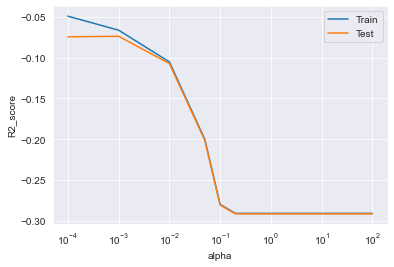

In [57]:
## Plotting R2 score vs alpha values
plt.plot(LassoCV_results['param_alpha'], LassoCV_results['mean_train_score'], label='Train')
plt.plot(LassoCV_results['param_alpha'], LassoCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

In [58]:
# Lasso Model Parameters Weightage
Lasso_parameters = list(sorted(Lasso.coef_))
Lasso_parameters.insert(0, Lasso.intercept_)
Lasso_parameters = [round(x, 3) for x in Lasso_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, Lasso_parameters))

[('constant', 11.439),
 ('LotFrontage', -0.124),
 ('LotArea', -0.047),
 ('YearRemodAdd', -0.045),
 ('MasVnrArea', -0.044),
 ('BsmtFinSF1', -0.043),
 ('BsmtFinSF2', -0.037),
 ('BsmtUnfSF', -0.037),
 ('TotalBsmtSF', -0.032),
 ('1stFlrSF', -0.032),
 ('2ndFlrSF', -0.026),
 ('LowQualFinSF', -0.025),
 ('GrLivArea', -0.025),
 ('BsmtFullBath', -0.021),
 ('BsmtHalfBath', -0.02),
 ('FullBath', -0.018),
 ('HalfBath', -0.016),
 ('BedroomAbvGr', -0.016),
 ('KitchenAbvGr', -0.016),
 ('TotRmsAbvGrd', -0.016),
 ('Fireplaces', -0.014),
 ('GarageCars', -0.011),
 ('GarageArea', -0.008),
 ('WoodDeckSF', -0.006),
 ('OpenPorchSF', -0.006),
 ('EnclosedPorch', -0.003),
 ('3SsnPorch', -0.002),
 ('ScreenPorch', -0.002),
 ('PoolArea', -0.001),
 ('MiscVal', -0.001),
 ('MoSold', -0.0),
 ('Age', -0.0),
 ('MSSubClass_30', -0.0),
 ('MSSubClass_40', 0.0),
 ('MSSubClass_45', 0.0),
 ('MSSubClass_50', -0.0),
 ('MSSubClass_60', 0.0),
 ('MSSubClass_70', 0.0),
 ('MSSubClass_75', 0.0),
 ('MSSubClass_80', 0.0),
 ('MSSubClass_

## Ridge

In [66]:
## Calling the Ridge function and fitting the data

Ridge = Ridge()

# cross validation
RidgeCV = GridSearchCV(estimator = Ridge, 
                        param_grid = Parameters, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 5,
                        return_train_score=True,
                        verbose = 1)            
RidgeCV.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [67]:
RidgeCV_results = pd.DataFrame(RidgeCV.cv_results_)
RidgeCV_results = RidgeCV_results[RidgeCV_results['param_alpha']<=100]
RidgeCV_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.013354,0.001475,0.005785,0.001934,0.0001,{'alpha': 0.0001},-0.096170,-0.092867,-0.107191,-0.086833,-0.093606,-0.095334,0.006673,26,-0.042678,-0.043674,-0.042674,-0.044131,-0.044183,-0.043468,0.000671
1,0.014555,0.003543,0.005187,0.000747,0.001,{'alpha': 0.001},-0.095900,-0.092694,-0.106662,-0.086712,-0.093395,-0.095073,0.006533,25,-0.042686,-0.043677,-0.042683,-0.044133,-0.044189,-0.043474,0.000669
2,0.013763,0.001828,0.004605,0.001217,0.01,{'alpha': 0.01},-0.094433,-0.092016,-0.104193,-0.085751,-0.091867,-0.093652,0.006000,24,-0.042749,-0.043715,-0.042738,-0.044171,-0.044290,-0.043533,0.000672
3,0.013164,0.002394,0.004189,0.000398,0.05,{'alpha': 0.05},-0.091331,-0.090437,-0.099000,-0.083369,-0.088101,-0.090448,0.005090,22,-0.043131,-0.043899,-0.043030,-0.044438,-0.044862,-0.043872,0.000716
4,0.012764,0.001163,0.003990,0.000630,0.1,{'alpha': 0.1},-0.088833,-0.089123,-0.095863,-0.081974,-0.085493,-0.088257,0.004605,21,-0.043633,-0.044134,-0.043423,-0.044812,-0.045425,-0.044285,0.000744


In [68]:
## View the optimal value of alpha
RidgeCV.best_params_

{'alpha': 7.0}

In [73]:
## Creating Ridge Model against optimal value of alpha
Ridge = Ridge(alpha=7)

# Fitting the model on training data
Ridge.fit(X_train, y_train)

## Making predictions
y_train_pred = Ridge.predict(X_train)
y_pred = Ridge.predict(X_test)

In [74]:
## Stats of Ridge
Ridge_R2Squared_Train = '%.2f' % r2_score(y_train, y_train_pred)
print("R-Squared (Train) =",Ridge_R2Squared_Train)
Ridge_R2Squared_Test = '%.2f' % r2_score(y_test, y_pred)
print("R-Squared (Test) =", Ridge_R2Squared_Test)
Ridge_RSS_Train = '%.2f' % (np.sum(np.square(y_train - y_train_pred)))
print("RSS (Train) =", Ridge_RSS_Train)
Ridge_RSS_Test = '%.2f' % (np.sum(np.square(y_test - y_pred)))
print("RSS (Test) =", Ridge_RSS_Test)
Ridge_MSE_Train = '%.2f' % (mean_squared_error(y_train, y_train_pred))
print("MSE (Train) =", Ridge_MSE_Train)
Ridge_MSE_Test = '%.2f' % (mean_squared_error(y_test, y_pred))
print("MSE (Test) =", Ridge_MSE_Test)
Ridge_RMSE_Train = '%.2f' % (mean_squared_error(y_train, y_train_pred))**0.5
print("RMSE (Train) =", Ridge_RMSE_Train)
Ridge_RMSE_Test = '%.2f' % (mean_squared_error(y_test, y_pred))**0.5
print("RMSE (Test) =", Ridge_RMSE_Test) 

R-Squared (Train) = 0.95
R-Squared (Test) = 0.90
RSS (Train) = 6.20
RSS (Test) = 5.57
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.08
RMSE (Test) = 0.11


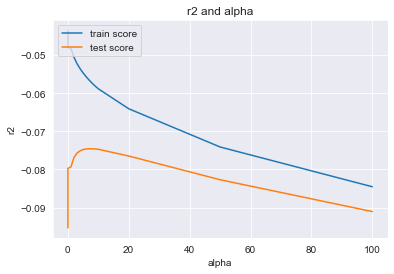

In [75]:
# plotting mean test and train scoes with alpha 
RidgeCV_results['param_alpha'] = RidgeCV_results['param_alpha'].astype('int32')

# plotting
plt.plot(RidgeCV_results['param_alpha'], RidgeCV_results['mean_train_score'])
plt.plot(RidgeCV_results['param_alpha'], RidgeCV_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')
plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [76]:
## View the results of cross validation search
RidgeCV.cv_results_

{'mean_fit_time': array([0.01335397, 0.01455507, 0.01376286, 0.01316409, 0.01276374,
        0.01196671, 0.01276898, 0.0129642 , 0.01455932, 0.01475921,
        0.01495872, 0.01455774, 0.01515698, 0.01176829, 0.01917667,
        0.01515813, 0.01396303, 0.01456075, 0.01574931, 0.01216607,
        0.0123642 , 0.01436224, 0.01336331, 0.01187172, 0.01216736,
        0.01331515, 0.0153585 , 0.01475916]),
 'std_fit_time': array([1.47547193e-03, 3.54267056e-03, 1.82843422e-03, 2.39369910e-03,
        1.16266426e-03, 1.23426238e-06, 2.13333627e-03, 1.09297787e-03,
        2.32472255e-03, 2.12852631e-03, 2.60061657e-03, 1.49084419e-03,
        2.70687892e-03, 3.99090864e-04, 7.35189077e-04, 3.05141284e-03,
        1.26074841e-03, 3.19211801e-03, 3.52950716e-03, 7.46469091e-04,
        4.88289571e-04, 2.23998958e-03, 1.95552327e-03, 1.85799744e-04,
        3.98445158e-04, 1.40925598e-03, 2.93256918e-03, 2.91771657e-03]),
 'mean_score_time': array([0.00578494, 0.0051868 , 0.00460496, 0.00418916, 

In [77]:
## Checking the coefficients of Ridge
Ridge_Coefficient = Ridge.coef_
Ridge_Coefficient

array([ 2.49674609e-02,  8.43908183e-02,  7.44664797e-02,  2.95086466e-03,
        6.13501648e-02,  1.14872861e-02,  6.17832378e-03,  1.32329547e-01,
        9.12101485e-02,  9.87971960e-02,  0.00000000e+00,  1.79562077e-01,
        2.01689233e-02, -7.86047121e-03,  3.42976638e-02,  2.63559581e-02,
        1.03295743e-02,  0.00000000e+00,  2.34873479e-02,  2.27905237e-02,
        4.16324072e-02,  8.20343990e-02,  3.47445082e-02,  2.02197527e-02,
        1.88630959e-03,  0.00000000e+00,  1.87285002e-02,  0.00000000e+00,
        0.00000000e+00,  7.85582388e-03, -9.03428092e-02, -4.76467634e-02,
       -1.43646544e-02, -4.73696523e-03,  1.52008785e-03, -7.76544398e-03,
        3.92585926e-02,  3.49533482e-02, -7.35817229e-03,  9.67053771e-03,
       -2.99774539e-02,  2.20242472e-03, -4.63041255e-02, -3.18937426e-02,
       -2.93339610e-02,  3.44795816e-02,  3.06800535e-02,  2.66639736e-02,
       -1.26037180e-02, -8.37080073e-03, -1.66247654e-03,  2.52571767e-02,
        6.28935445e-03, -

In [78]:
# Ridge Model Parameters Weightage
Ridge_parameters = list(sorted(Ridge.coef_))
Ridge_parameters.insert(0, Ridge.intercept_)
Ridge_parameters = [round(x, 3) for x in Ridge_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, Ridge_parameters))

[('constant', 11.339),
 ('LotFrontage', -0.09),
 ('LotArea', -0.079),
 ('YearRemodAdd', -0.069),
 ('MasVnrArea', -0.063),
 ('BsmtFinSF1', -0.062),
 ('BsmtFinSF2', -0.06),
 ('BsmtUnfSF', -0.057),
 ('TotalBsmtSF', -0.056),
 ('1stFlrSF', -0.053),
 ('2ndFlrSF', -0.049),
 ('LowQualFinSF', -0.048),
 ('GrLivArea', -0.047),
 ('BsmtFullBath', -0.046),
 ('BsmtHalfBath', -0.045),
 ('FullBath', -0.04),
 ('HalfBath', -0.038),
 ('BedroomAbvGr', -0.036),
 ('KitchenAbvGr', -0.036),
 ('TotRmsAbvGrd', -0.033),
 ('Fireplaces', -0.033),
 ('GarageCars', -0.032),
 ('GarageArea', -0.032),
 ('WoodDeckSF', -0.032),
 ('OpenPorchSF', -0.031),
 ('EnclosedPorch', -0.03),
 ('3SsnPorch', -0.03),
 ('ScreenPorch', -0.03),
 ('PoolArea', -0.03),
 ('MiscVal', -0.03),
 ('MoSold', -0.029),
 ('Age', -0.029),
 ('MSSubClass_30', -0.029),
 ('MSSubClass_40', -0.029),
 ('MSSubClass_45', -0.028),
 ('MSSubClass_50', -0.027),
 ('MSSubClass_60', -0.027),
 ('MSSubClass_70', -0.027),
 ('MSSubClass_75', -0.026),
 ('MSSubClass_80', -0.0

# Comparision of Both models

In [79]:
## Printing Stats of both model together
print("Score Type       | Lasso | Ridge")
print("R2 Score (Train)","|",Lasso_R2Squared_Train," |", Ridge_R2Squared_Train)
print("R2 Score (Test)"," |",Lasso_R2Squared_Test," |", Ridge_R2Squared_Test)
print("RSS (Train)","     |",Lasso_RSS_Train," |", Ridge_RSS_Train)
print("RSS (Test)","      |",Lasso_RSS_Test," |", Lasso_RSS_Test)
print("MSE (Train)","     |",Lasso_MSE_Train," |", Ridge_MSE_Train)
print("MSE (Test)","      |",Lasso_MSE_Test," |", Ridge_MSE_Test)
print("RMSE (Train)","    |",Lasso_RMSE_Train," |", Ridge_RMSE_Train)
print("RMSE (Test)","     |",Lasso_RMSE_Test," |", Ridge_RMSE_Test)

Score Type       | Lasso | Ridge
R2 Score (Train) | 0.93  | 0.95
R2 Score (Test)  | 0.89  | 0.90
RSS (Train)      | 8.58  | 6.20
RSS (Test)       | 5.87  | 5.87
MSE (Train)      | 0.01  | 0.01
MSE (Test)       | 0.01  | 0.01
RMSE (Train)     | 0.09  | 0.08
RMSE (Test)      | 0.12  | 0.11


In [84]:
## Making table of all variable for Model output comparison

Weight = pd.DataFrame(index=X.columns)
Weight.rows = X.columns
Weight

## Filling the Coefficient data
Weight['Ridge'] = Ridge_Coefficient
Weight['Lasso'] = Lasso_Coefficent

## View the coefficients
Weight

,Ridge,Lasso
LotFrontage,0.024967,0.003357
LotArea,0.084391,0.080043
YearRemodAdd,0.074466,0.085023
MasVnrArea,0.002951,0.000000
BsmtFinSF1,0.061350,0.063478
BsmtFinSF2,0.011487,0.000000
BsmtUnfSF,0.006178,-0.000000
TotalBsmtSF,0.132330,0.167289
1stFlrSF,0.091210,0.000000
2ndFlrSF,0.098797,0.008966


## Knowing the behavior of Lasso, it makes more zeroed coefficient variables

In [85]:
## View the number of features removed by lasso
Weight[Weight['Lasso']==0].shape

(305, 2)

In [87]:
## View the features selected by lasso
Weight.loc[Weight['Lasso']!=0, 'Lasso']

LotFrontage              0.003357
LotArea                  0.080043
YearRemodAdd             0.085023
BsmtFinSF1               0.063478
TotalBsmtSF              0.167289
2ndFlrSF                 0.008966
GrLivArea                0.391963
BsmtFullBath             0.021169
FullBath                 0.012687
HalfBath                 0.022725
Fireplaces               0.006007
GarageCars               0.025145
GarageArea               0.095595
WoodDeckSF               0.029161
OpenPorchSF              0.009125
ScreenPorch              0.004254
Age                     -0.124084
MSSubClass_30           -0.016064
MSSubClass_70            0.021764
MSSubClass_90           -0.025147
MSSubClass_160          -0.024988
MSSubClass_190          -0.001788
MSZoning_RM             -0.044294
LotShape_Reg            -0.000170
LotConfig_CulDSac        0.021183
Neighborhood_BrkSide     0.016223
Neighborhood_ClearCr     0.040921
Neighborhood_Crawfor     0.097123
Neighborhood_Edwards    -0.043401
Neighborhood_M

## As oberserved, Ridge performed well compared to Lasso

In [88]:
## View the top 10 features's coefficent of Ridge
Weight['Ridge'].sort_values(ascending=False)[:10]

GrLivArea               0.179562
TotalBsmtSF             0.132330
OverallQual_9           0.105782
2ndFlrSF                0.098797
OverallQual_8           0.091574
1stFlrSF                0.091210
Neighborhood_Crawfor    0.087293
LotArea                 0.084391
OverallCond_9           0.082235
GarageArea              0.082034
Name: Ridge, dtype: float64

In [89]:
## View the top 10 features's coefficent of Lasso
Weight['Lasso'].sort_values(ascending=False)[:10]

GrLivArea               0.391963
TotalBsmtSF             0.167289
OverallQual_9           0.163142
OverallQual_8           0.127511
Neighborhood_Crawfor    0.097123
GarageArea              0.095595
YearRemodAdd            0.085023
LotArea                 0.080043
BsmtFinSF1              0.063478
Neighborhood_Somerst    0.062581
Name: Lasso, dtype: float64

# Final Observations
## Comparing both model performance
- The Test data result on both model are performing very closely, no outliers there.
- R2 is close to 90% for both models on Test but Ridge has higher weightage.

### By looking the both models coefficients, below features are important for price prediction
- Above Gound Living(GrLiveArea)
- Total Basement Area(TotalBsmtSF)
- Overall Material & finishing of house Excellent(OverallQual_9) & Very Good(OverallQual_8)
- Neighborhood of Crawford (Neighborhood_Crawfor)
- Size of Garage (GarageArea)
- Lot Size (LotArea)

### Recommendations for Business
- Investigaing in properties with Basement.
- Locatality preference should be Crawford & Somerst
- Property overall size should high so if Garage is not there, business can provision it to increase prices.
- Properties with Overall Quality rating between Fair(3) to (7) should be considered. Because with repair\renovation work, property prices can be increased.